In [19]:
from os import listdir
from os.path import isfile, join
billsPath = '../bills/'
onlyBills = [f for f in listdir(billsPath) if isfile(join(billsPath, f))]
print(len(onlyBills))

1180


In [20]:
from pathlib import Path

billsWithSize = []

for b in onlyBills:
    billsWithSize += [(b,Path(billsPath + b).stat().st_size)]

billsWithSize[:3]

[('1993_599.txt', 59981), ('1993_602.txt', 8047), ('1993_645.txt', 729)]

In [21]:
f = lambda x: -x[1]
billsWithSize.sort(key=f)
billsWithSize
top50 = billsWithSize[:50]
top50[:4]

[('2000_696.txt', 579582),
 ('1996_465.txt', 420981),
 ('2001_627.txt', 413929),
 ('1997_555.txt', 396494)]

In [22]:
def removeNonAlpha(s):
    out = ""
    for a in s:
        if a.isalpha():
            out += a
    return out


def findBigLettersSequences(sentence):

    sentence = sentence.split()
    sentence = sentence[1:]
    
    if len(sentence) < 1:
        return []
    
    out = []
    i = -1
    while i + 1 < len(sentence):
        i += 1
        if sentence[i][0].isupper() and sentence[i][0].isalpha():
            #Remove all non alpha from string
            sentence[i] = removeNonAlpha(sentence[i])
            tmp = [sentence[i]]
            while i+1 < len(sentence):
                i += 1
                if sentence[i][0].isupper() and sentence[i][0].isalpha():
                    sentence[i] = removeNonAlpha(sentence[i])
                    #Remove all non alpha from string
                    tmp += [sentence[i]]
                else:
                    break
            out += [tmp]
    return out
        
            
sequences = []
for b,_ in top50:
    bPath = billsPath + b
    f = open(bPath,encoding='utf-8')
    content = f.read()
    f.close()
    
    sentences = content.split('.')
    
    for s in sentences:
        o = findBigLettersSequences(s)
#         print(o)
        sequences += o
print(sequences[:3])
print(len(sequences))

[['USTAWA'], ['Art'], ['Ministrów']]
26310


In [ ]:
#merge
sequences_with_count = {}
for s in sequences:
    key = ""
    for s2 in s:
        key += s2 + ' '
    key = key[:-1]
    
    x = sequences_with_count.get(key,0)
    sequences_with_count[key] = x + 1
    
len(sequences_with_count.keys())
sequences_with_count

In [ ]:
import requests
url = "http://localhost:9200"

after_lematization_with_count = {}
for s in sequences_with_count:
    res = requests.post(url, data=s.encode('utf-8'))
    x = after_lematization_with_count.get(res,0)
    after_lematization_with_count[res] = x + sequences_with_count[s]   

len(after_lematization_with_count)
after_lematization_with_count

In [25]:
after_lematization_with_count_list = []

for j in after_lematization_with_count:
    key = ""
    lines = j.text.splitlines()
    for l in lines:
        tmp = l.split()
        if len(tmp) != 2:
            continue
        key += tmp[0] + ' '
    key = key[:-1]
    after_lematization_with_count_list += [(key,after_lematization_with_count[j])]

f = lambda x: -x[1]
after_lematization_with_count_list.sort(key=f)
after_lematization_with_count_list[:50]
after_lematization_with_count = {}

for k,c in after_lematization_with_count_list:
    x = after_lematization_with_count.get(k,0)
    after_lematization_with_count[k] = x + c


In [26]:
after_lematization_with_count_list[:50]

[('Nr', 3959),
 ('Art', 864),
 ('Rzeczypospolitej Polskiej', 674),
 ('Kodeksu', 398),
 ('Skarbu Państwa', 302),
 ('Prawo', 301),
 ('Policji', 299),
 ('Unii Europejskiej', 280),
 ('Dz', 233),
 ('Ministrów', 224),
 ('Państwowej Straży Pożarnej', 198),
 ('Rady Ministrów', 195),
 ('Zmiany', 186),
 ('Kasy Chorych', 181),
 ('Straży Granicznej', 164),
 ('Sprawiedliwości', 162),
 ('Rady', 159),
 ('Azot', 155),
 ('I', 144),
 ('Znak', 143),
 ('Finansów', 142),
 ('Tkaniny', 140),
 ('Funduszu', 139),
 ('Pozostałe', 133),
 ('Obrony Narodowej', 122),
 ('Rozdział', 117),
 ('II', 114),
 ('Zakładu', 112),
 ('Europejskiego Porozumienia', 105),
 ('Wolnym Handlu', 105),
 ('PO', 103),
 ('Państwowej Komisji Wyborczej', 100),
 ('Administracji', 99),
 ('Przepisy', 94),
 ('III', 94),
 ('Maszyny', 94),
 ('Damskie', 93),
 ('Europejskim Obszarze Gospodarczym', 92),
 ('New Romanserif', 91),
 ('Skarb Państwa', 87),
 ('Ordynacja', 87),
 ('Opieki Społecznej', 85),
 ('Urzędu', 83),
 ('Kodeks', 82),
 ('Biura', 79),
 ('

In [9]:
top_50_text = {}

for b,s in top50:
    f = open(billsPath+b,encoding='utf-8')
    
    top_50_text[b] = f.read()
    f.close()


In [ ]:
import json
import requests
import glob
import os
import time
 
user="" 
lpmn='any2txt|wcrft2|liner2({"model":"n82"})'
url = "http://ws.clarin-pl.eu/nlprest2/base" 
def upload(text):
    r = requests.post(url=url + '/startTask',
                             json={
                                 'text': text,
                                 'lpmn': lpmn,
                                 'user': user,
                             })
    if r.status_code == 200:
        print('OK')
        return r.content.decode("utf-8")
    else:
        print("sentErr: " + str(r.status_code))
        return None

def process(taskid):
        data = requests.get(url+'/getStatus/'+taskid).json();
        i = 0
        while data["status"] == "QUEUE" or data["status"] == "PROCESSING" :
            time.sleep(0.5);
            data = requests.get(url+'/getStatus/'+taskid).json();
            i += 1
            if i == 120:
                print('\tW: ' + str(data))
                i = 0
        if data["status"]=="ERROR":
            print("Error "+data["value"])
            return None;
        return data["value"]

def main():
    out_path= './out/'
    tmp = {}
    i=-1
    for k in top_50_text:
        i+= 1
        if i < 18:
            continue
        tmp[k] = top_50_text[k]
    
    
    
    for file in tmp:
        t = top_50_text[file]
        file = '../bills/' + file
        start_time = time.time()
        fileid=upload(t)
        print("Processing: {} taskid: {}".format(file,fileid))
        data=process(fileid)
        if data==None:
            continue;
        data=data[0]["fileID"];
        content = requests.get(url+'/download'+data).content.decode("utf-8");
        with open(out_path+os.path.basename(file)+'.ccl', "w",encoding='utf-8', errors='ignore') as outfile:
                outfile.write(content)
    print("GLOBAL %s seconds ---" % (time.time() - global_time))

main();

In [ ]:
#I have run this once and this is enaugh. It was quite badly implemented bacause i was sequentialy uploding receiving then again uploding and receiving....
# I should have uploaded all and thebn wait for all results. 

In [52]:
# https://www.datacamp.com/community/tutorials/python-xml-elementtree?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034358&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1011367&gclid=Cj0KCQiA5bz-BRD-ARIsABjT4nhi-iTj0XtnUxsGMQRSTq0OBK3DqWAur-a0u1qgx1fuRNMMwkfjz84aAi82EALw_wcB
import xml.etree.ElementTree as ET

def load_xml_for_bill(bill):
    path = "./out/" + bill
    tree = ET.parse(path)
    root = tree.getroot()
    return root

def create_dicts_for_single_bill(root):
    
    bill_class_count = {} # class_CG : count 
    bill_class_NE_count = {} # class_CG : (NE : count)
    bill_classFG_NE_count = {} # class_FG : (NE : count)
    
    
    for sentence in root.findall('chunk/sentence'):
        tmp_dict = {} # (NUM,CLASS_NAME) : W1 W2 ...
        for token in sentence.findall('tok'):
            word = token.find('lex').find('base').text
            for ann in token.findall('ann'):
                fg_class_num = ann.text
                fg_class_name = ann.attrib['chan']
                cg_class_name = fg_class_name.split('_')[0] + '_' + fg_class_name.split('_')[1]
                
                
                tmp_dict[(fg_class_num,fg_class_name,cg_class_name)] = tmp_dict.get((fg_class_num,fg_class_name,cg_class_name),"") + word + " "
                
        for fg_class_num,fg_class_name,cg_class_name in tmp_dict:
            word = tmp_dict[(fg_class_num,fg_class_name,cg_class_name)]
            
            bill_class_count[cg_class_name] = bill_class_count.get(cg_class_name,0) + 1

            x = bill_class_NE_count.get(cg_class_name,{})
            x[word] = x.get(word,0) + 1
            bill_class_NE_count[cg_class_name] = x

            x = bill_classFG_NE_count.get(fg_class_name,{})
            x[word] = x.get(word,0) + 1
            bill_classFG_NE_count[fg_class_name] = x
                
    return bill_class_count, bill_class_NE_count, bill_classFG_NE_count


    

In [53]:
top50_NER = {}
for b,_ in top50:
    root = load_xml_for_bill(b)
    top50_NER[b] = create_dicts_for_single_bill(root)


In [54]:
#     bill_class_count = {} # class_CG : count 
#     bill_class_NE_count = {} # class_CG : (NE : count)
#     bill_classFG_NE_count = {} # class_FG : (NE : count)

def merge_bill_class_count(d1,d2):
    out = {}
    for k in d1:
        if k not in out:
            out[k] = d1.get(k,0) + d2.get(k,0)
    for k in d2:
        if k not in out:
            out[k] = d1.get(k,0) + d2.get(k,0)
    return out

# this will actualy work for both dicts 
def merge_bill_class_NE_count(d1,d2):
    out = {}
    
    # getting all classes
    cg_classes = list(d1.keys())
    cg_classes += list(d2.keys())
    cg_classes = set(cg_classes)

    for cg in cg_classes:
        
        #getting all NE in class
        NEs = list(d1.get(cg,{}).keys())
        NEs += list(d2.get(cg,{}).keys())
        NEs = set(NEs)
        
        for NE in NEs:
            c1 = d1.get(cg,{}).get(NE,0)
            c2 = d2.get(cg,{}).get(NE,0)
            
            class_dict = out.get(cg,{})
            NE_count = class_dict.get(NE,0) + c1 + c2
            class_dict[NE] = NE_count
            
            out[cg] = class_dict
    return out
    

In [55]:
bill_class_count = {} # class_CG : count 
bill_class_NE_count = {} # class_CG : (NE : count)
bill_classFG_NE_count = {} # class_FG : (NE : count)
for b in top50_NER:
    d1,d2,d3 = top50_NER[b]
    bill_class_count = merge_bill_class_count(bill_class_count,d1)
    bill_class_NE_count = merge_bill_class_NE_count(bill_class_NE_count,d2)
    bill_classFG_NE_count = merge_bill_class_NE_count(bill_classFG_NE_count,d3)

In [56]:
bill_class_count

{'nam_pro': 7378,
 'nam_org': 16433,
 'nam_loc': 2719,
 'nam_liv': 1249,
 'nam_eve': 108,
 'nam_adj': 679,
 'nam_fac': 282,
 'nam_oth': 947,
 'nam_num': 28}

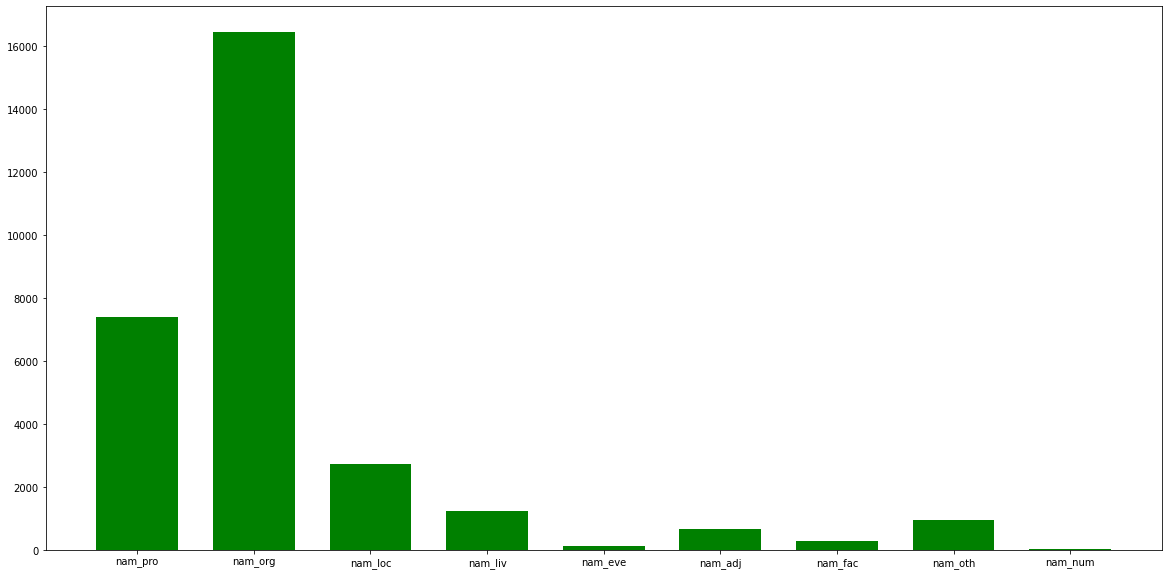

In [57]:
#histogram for bill_class_count
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.bar(bill_class_count.keys(), bill_class_count.values(), width = 0.7, color='g')
plt.show()


In [66]:
for cg in bill_class_NE_count:
    NE_count = bill_class_NE_count[cg]
    NE_count_list = [(k,v) for k,v in NE_count.items()]
    
    NE_count_list.sort(key = lambda x: -x[1])
    
    print(cg)
    for x in range(10):
        print('\t{} : {}'.format(NE_count_list[x][0],NE_count_list[x][1]))
    

nam_oth
	złoty  : 339
	euro  : 119
	PESEL  : 14
	bat  : 12
	nowy_polski_złoty  : 10
	minister edukacja narodowy  : 8
	– 40 tys . .  : 8
	ECU  : 7
	NIP  : 5
	Internet  : 5
nam_num
	1  : 13
	przepływ pieniężny netto z działalność inwestycyjny ( I-II ) C . przepływ środek pieniężny z działalność finansowy i . wpływ .  : 3
	przepływ pieniężny netto z działalność operacyjny ( i + / - II ) bajt . przepływ środek pieniężny z działalność inwestycyjny i . wpływ .  : 2
	rachunek przepływ pieniężny ( metoda bezpośredni ) a . przepływ środek pieniężny z działalność operacyjny i . wpływ .  : 2
	pozostały przychod przyszły okres oraz zastrzec X . rezerwa .  : 1
	inny rozliczenie międzyokresowy bajt . aktywa obrotowy i . zapas .  : 1
	przepływ pieniężny netto z działalność operacyjny ( I-II ) bajt . przepływ z działalność lokacyjny i . wpływ .  : 1
	prawomocny orzeczenie kolegium oraz prawomocny postanowienie o umorzyć postępowanie , a także prawomocny nakaz karny móc być uchylić w wypadek wystąpieni

In [70]:
fg_NE_count_list = []
for fg in bill_classFG_NE_count:
    NE_count = bill_classFG_NE_count[fg]
    for NE in NE_count:
        fg_NE_count_list.append( (NE,NE_count[NE],fg) )


fg_NE_count_list.sort(key = lambda x: -x[1])
fg_NE_count_list[:50]

[('Dzieje_(Apostolskie) . u . ', 1094, 'nam_pro_media_periodic'),
 ('rzeczpospolita polski ', 815, 'nam_loc_gpe_country'),
 ('dziennik . u . ', 484, 'nam_pro_media_periodic'),
 ('skarb państwo ', 406, 'nam_org_institution'),
 ('złoty ', 339, 'nam_oth_currency'),
 ('minister sprawiedliwość ', 318, 'nam_org_institution'),
 ('unia europejski ', 307, 'nam_org_organization'),
 ('rada minister ', 279, 'nam_org_institution'),
 ('państwowy komisja wyborczy ', 267, 'nam_org_institution'),
 ('minister obrona narodowy ', 265, 'nam_org_institution'),
 ('prezes rad minister ', 262, 'nam_org_institution'),
 ('minister finanse ', 233, 'nam_org_institution'),
 ('państwowy straż pożarny ', 223, 'nam_org_organization'),
 ('Times ', 205, 'nam_pro_media_periodic'),
 ('polski ', 204, 'nam_adj_country'),
 ('prezes urząd ', 201, 'nam_org_institution'),
 ('urząd patentowy ', 196, 'nam_org_institution'),
 ('urząd ochrona państwo ', 176, 'nam_org_institution'),
 ('euro ', 119, 'nam_oth_currency'),
 ('sąd najwyż

# Answer the following questions:

### Which of the method (counting expressions with capital letters vs. NER) worked better for the task concerned with identification of the proper names?

NER performed better but that does not mean that first try was meaningless. It also provided some useful data but we can see more errors in it such as 'I'.


### What are the drawbacks of the method based on capital letters?

It is not really precise. We can see lots of mistakes and we ignore beginning of the sentence and finally we split corpus by '.' but some expressions include '.' in them.


### What are the drawbacks of the method based on NER?

Sending data to the server, it requires online connections + analysis is not performed really fast. Performing it sequentially was a bad idea in my case :).


### Which of the coarse-grained NER groups has the best and which has the worst results? Try to justify this observation.

The worst were in nam_num because they were too long and not really common in whole bibliography.
To me the best results are in nam_org, nam_loc, nam_liv maybe because i expected to see such results like organisations' names.


### Do you think NER is sufficient for identifying different occurrences of the same entity (i.e. consider "USA" and "Stany Zjednoczone" and "Stany Zjednoczone Ameryki Północnej") ? If not, can you suggest an algorithm or a tool that would be able to group such names together?

I think that it lacks knowledge needed to consider these names as equal. 
We can observe this in the following example:
nam_loc:
	rzeczpospolita polski  : 815
	Rzeczpospolita Polska  : 97
	Polska  : 72
    
These 3 can be considered as the same but to NER they are not queal. To eliminate this problem we should create/use something like specialized synonyms dictionary.


### Can you think of a real world problem that would benefit the most from application of Named Entity Recognition algorithm?

For example in auto correction algorithms that are sometimes very frustrating especially on phones.
